# Mini-Project on "Fake News Detection"


## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0.0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1.0
1,1.0,NaN,Did they post their votes for Hillary already?,1.0
2,2.0,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1.0
3,3.0,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0.0
4,4.0,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14881 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14881 non-null  float64
 1   title       14881 non-null  object 
 2   text        14881 non-null  object 
 3   label       14881 non-null  float64
dtypes: float64(2), object(2)
memory usage: 581.3+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
df.size
df.shape

(14881, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
#dropping unwanted columns
dataframe=df.drop(["Unnamed: 0","title"], axis = 1)

In [ ]:
dataframe.columns

Index(['text', 'label'], dtype='object')

In [ ]:
dataframe.head(10)

,text,label
0,No comment is expected from Barack Obama Membe...,1.0
2,"Now, most of the demonstrators gathered last ...",1.0
3,A dozen politically active pastors came here f...,0.0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1.0
5,All we can say on this one is it s about time ...,1.0
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1.0
7,,1.0
8,"The owner of the Ringling Bar, located south o...",1.0
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1.0
10,The most punchable Alt-Right Nazi on the inter...,1.0


In [ ]:
dataframe.tail(10)

,text,label
15069,Alisyn Camerota sparred with Rep. Scott Taylor...,1.0
15070,DOHA (Reuters) - Qatar has agreed to strengthe...,0.0
15071,James O Keefe has been at the forefront of new...,1.0
15072,COPENHAGEN (Reuters) - A Danish inventor accus...,0.0
15073,Pro-Bernie Sanders Commie clashes with Neil Ca...,1.0
15074,MOSCOW (Reuters) - Russia is working on defens...,0.0
15075,DUBAI (Reuters) - The Israeli army s chief of ...,0.0
15076,WASHINGTON (Reuters) - Michigan Governor Rick ...,0.0
15077,CAIRO (Reuters) - An Egyptian army officer was...,0.0
15078,MOSCOW (Reuters) - Russia is ready to resume c...,0.0


## Feature Engineering

In [ ]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataframe['text'], dataframe['label'], test_size=0.25, random_state=42)

In [ ]:
#Converting text data to numerical features using vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#Label encoding the variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

## ML Techniques (3 used)

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train_encoded, cv=5)
    print(f'{name} Cross-Validation Accuracy: {cv_scores.mean()}')

    # Training
    model.fit(X_train_tfidf, y_train_encoded)

    # Prediction
    y_pred = model.predict(X_test_tfidf)

    # Evaluation
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f'{name} Test Accuracy: {accuracy}')
    print(f'{name} Classification Report:\n{classification_report(y_test_encoded, y_pred)}')

LogisticRegression Cross-Validation Accuracy: 0.9162186379928314
LogisticRegression Test Accuracy: 0.9252889008331093
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1755
           1       0.93      0.93      0.93      1966

    accuracy                           0.93      3721
   macro avg       0.93      0.92      0.93      3721
weighted avg       0.93      0.93      0.93      3721

RandomForest Cross-Validation Accuracy: 0.9077060931899641
RandomForest Test Accuracy: 0.9247514109110454
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1755
           1       0.91      0.95      0.93      1966

    accuracy                           0.92      3721
   macro avg       0.93      0.92      0.92      3721
weighted avg       0.93      0.92      0.92      3721

SVM Cross-Validation Accuracy: 0.93163082437

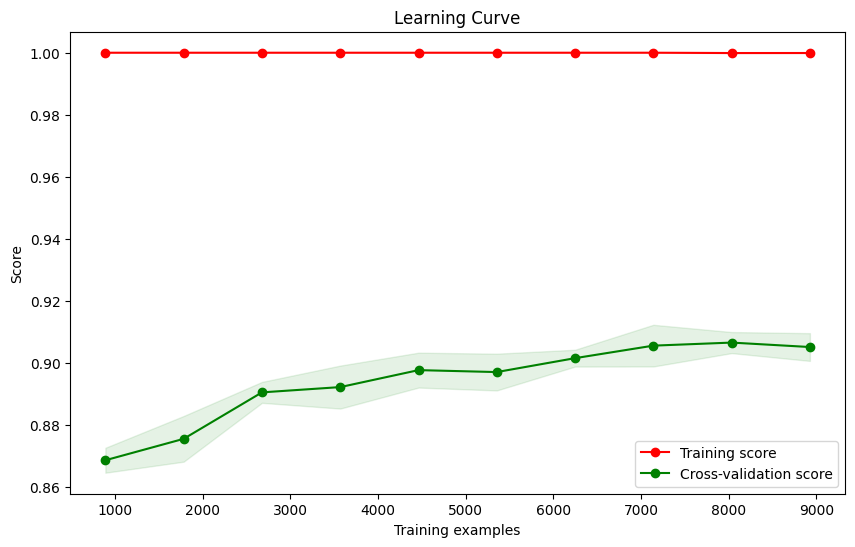

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.legend(loc="best")
    plt.show()

best_model = RandomForestClassifier()
plot_learning_curve(best_model, X_train_tfidf, y_train_encoded, "Learning Curve")
